# Loading Dataset

In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv('penguins (1).csv')

In [22]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


# EDA

<Axes: ylabel='body_mass_g'>

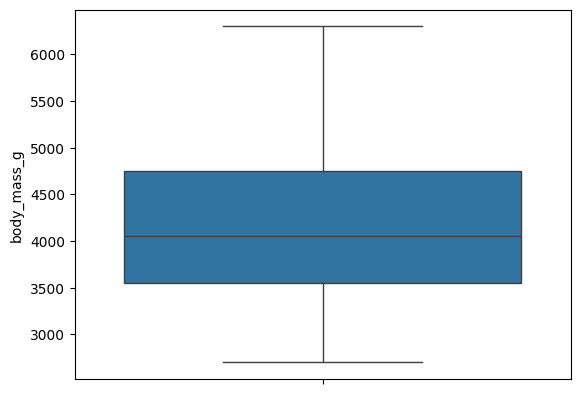

In [23]:
import seaborn as sns

sns.boxplot(data=data['body_mass_g'])

<Axes: ylabel='culmen_depth_mm'>

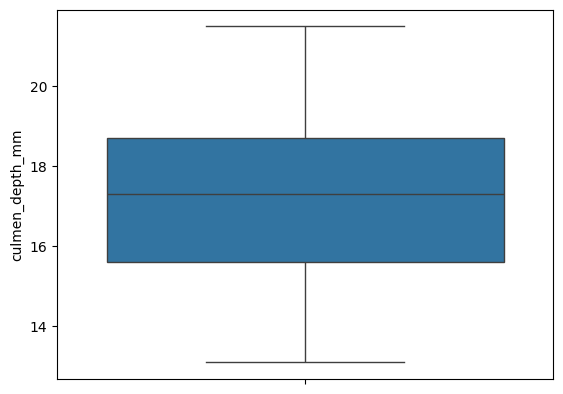

In [24]:
sns.boxplot(data=data['culmen_depth_mm'])

<Axes: ylabel='culmen_length_mm'>

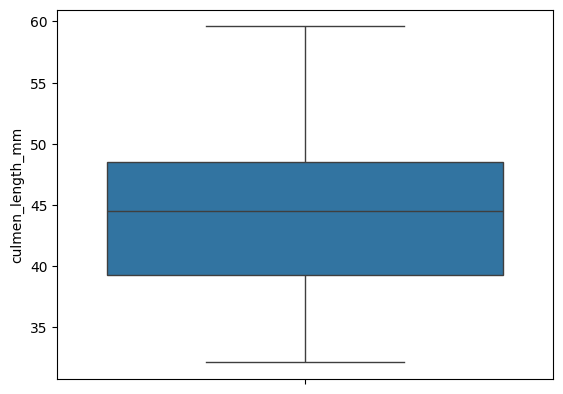

In [25]:
sns.boxplot(data=data['culmen_length_mm'])

<Axes: ylabel='flipper_length_mm'>

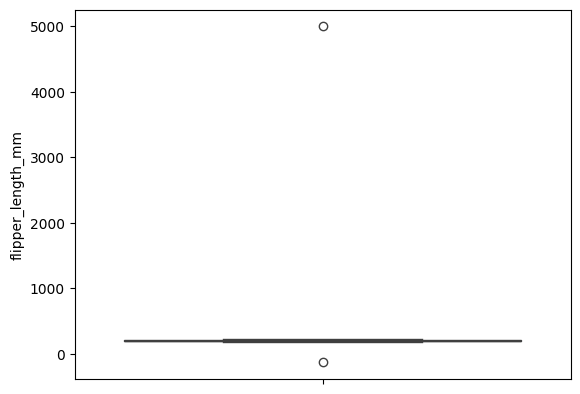

In [26]:
sns.boxplot(data=data['flipper_length_mm'])

# Preprocessing

In [27]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [28]:
male = data[data.sex=='MALE'].copy()
female = data[data.sex=='FEMALE'].copy()

data = pd.concat([male,female],ignore_index=True)

In [29]:
data['sex'].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

In [30]:

Q1 = data['flipper_length_mm'].quantile(0.25)
Q3 = data['flipper_length_mm'].quantile(0.75)

IQR = Q3 - Q1

Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

lower_array = np.where(data['flipper_length_mm']<=Lower)[0]
upper_array = np.where(data['flipper_length_mm']>=Upper)[0]


data.drop(index=lower_array,inplace=True)
data.reset_index(drop=True,inplace=True)
data.drop(index=upper_array,inplace=True)
data.reset_index(drop=True,inplace=True)

In [31]:
data.shape

(332, 5)

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

encoder = LabelEncoder()
copydf = data.copy()
data['sex'] = encoder.fit_transform(data['sex'])

scaler  = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data,columns=copydf.columns)


In [33]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.867170,1.761074,-0.783164,-0.691149,0.993994
2,-0.885538,1.250172,-0.426399,0.581912,0.993994
3,-0.995746,2.067616,-0.711811,-0.504847,0.993994
4,-0.279393,1.812165,-0.283693,0.364560,0.993994


In [34]:
from sklearn.decomposition import PCA
nums = np.arange(len(data.columns))

var_ratio = []

for num in nums:
    pca = PCA(n_components=num)
    pca.fit(data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

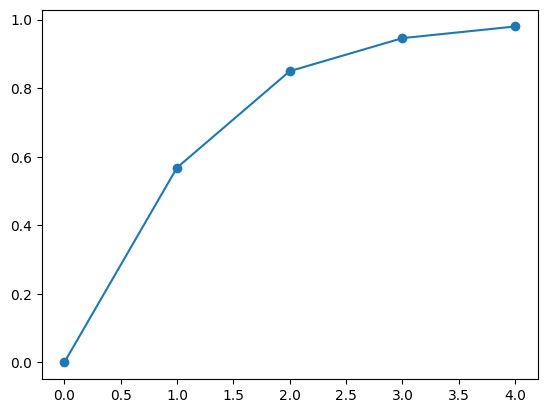

In [35]:
import matplotlib.pyplot as plt

plt.plot(nums,var_ratio,marker='o')
plt.show()

# 2 Components

In [36]:
pca = PCA(n_components=2)
data2 = pca.fit_transform(data)

In [37]:
data2.shape

(332, 2)

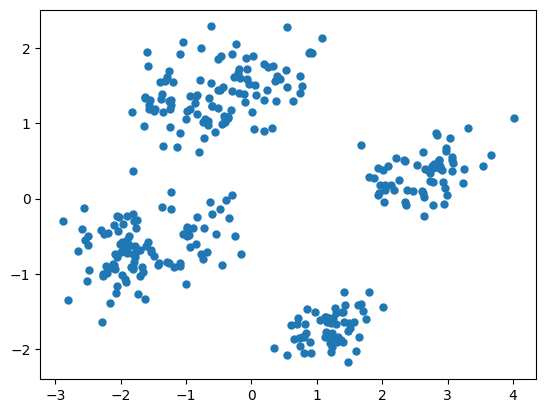

In [38]:
plt.scatter(data2[:, 0],data2[:,1], s=25)
plt.show()

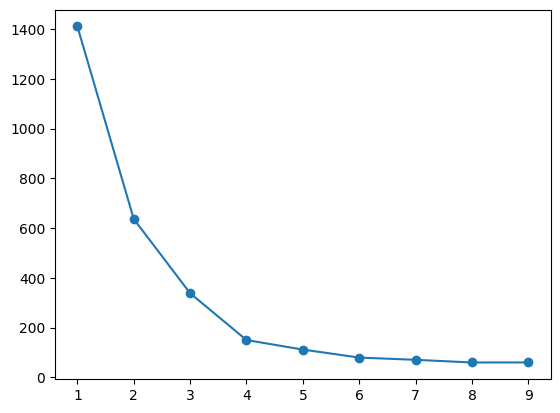

In [39]:
from sklearn.cluster import KMeans
inertia = []
for k in range (1,10):
    kmeans = KMeans(n_clusters=k).fit(data2)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10),inertia,marker='o')
plt.show()

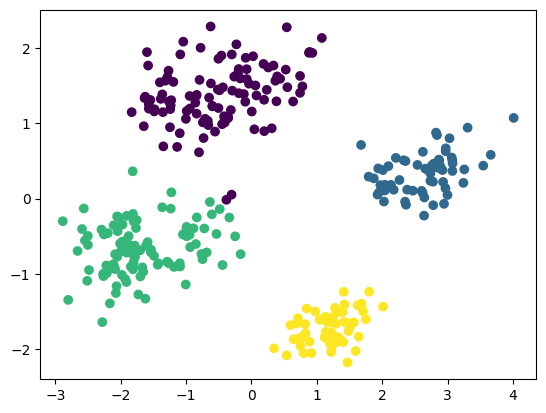

In [40]:
kmeans = KMeans(n_clusters=4).fit(data2)

plt.scatter(data2[:, 0],data2[:, 1],c = kmeans.labels_, cmap='viridis')
plt.show()

## Silhouette Score

In [52]:
from sklearn.metrics import silhouette_score

silhouetteScore = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(data2)
    silhouetteScore.append(silhouette_score(data2,kmeans.labels_))

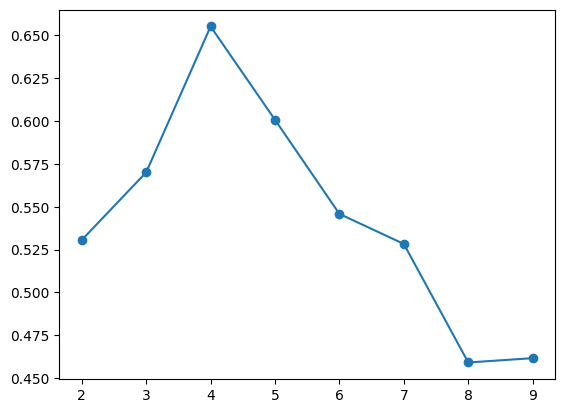

In [56]:
plt.plot(range(2,10),silhouetteScore,marker='o')
plt.show()

In [54]:
print(silhouetteScore)

[0.5306152382845915, 0.5700688888234272, 0.6551502355737142, 0.6007182985526682, 0.5458168447212389, 0.5282985714525857, 0.45917795236230236, 0.46169964747291325]


# 3 Components

In [41]:
pca = PCA(n_components=3)
data3 = pca.fit_transform(data)

In [42]:
data3.shape

(332, 3)

In [43]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(data3)


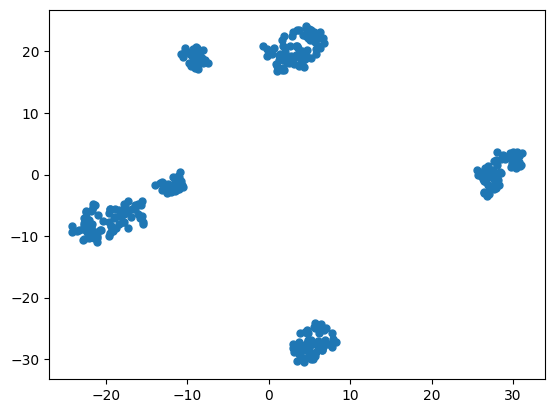

In [44]:
plt.scatter(tsne_features[:,0],tsne_features[:,1],s=25)
plt.show()

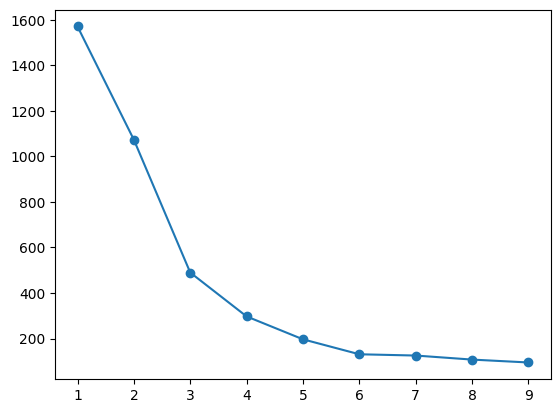

In [48]:
inertia2 = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(data3)
    inertia2.append(kmeans.inertia_)

plt.plot(range(1,10),inertia2,marker='o')
plt.show()

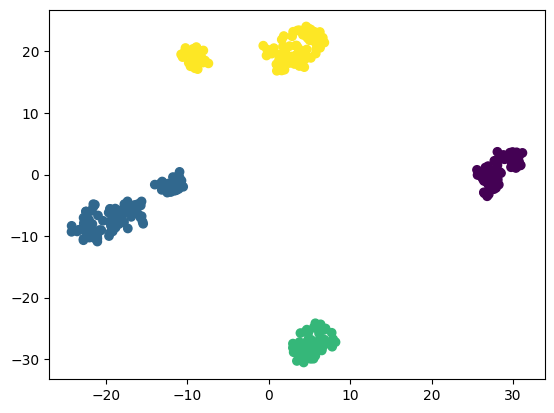

In [50]:
kmeans = KMeans(n_clusters=4).fit(data3)

plt.scatter(tsne_features[:,0],tsne_features[:,1],c = kmeans.labels_)
plt.show()

## Silhouette Score

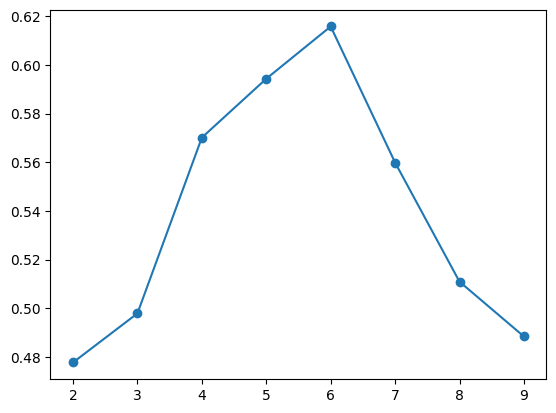

In [66]:
silhouette2 =[]

for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(data3)
    silhouette2.append(silhouette_score(data3,kmeans.labels_))

plt.plot(range(2,10),silhouette2,marker='o')
plt.show()

In [58]:
print(silhouette2)

[0.4777779457267382, 0.34091382256326197, 0.4777779457267382, 0.4777779457267382, 0.4777779457267382, 0.4777779457267382, 0.4777779457267382, 0.4777779457267382]


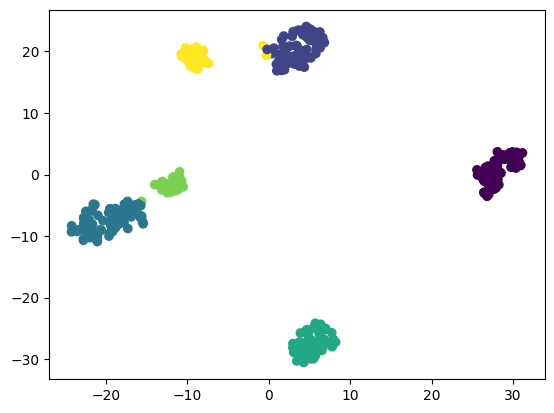

In [67]:
kmeans = KMeans(n_clusters=6).fit(data3)

plt.scatter(tsne_features[:,0],tsne_features[:,1],c = kmeans.labels_)
plt.show()